## Underwater  Mine Prediction using SONAR Signals dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
sonar_data = pd.read_csv(r'sonar_data.csv',header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


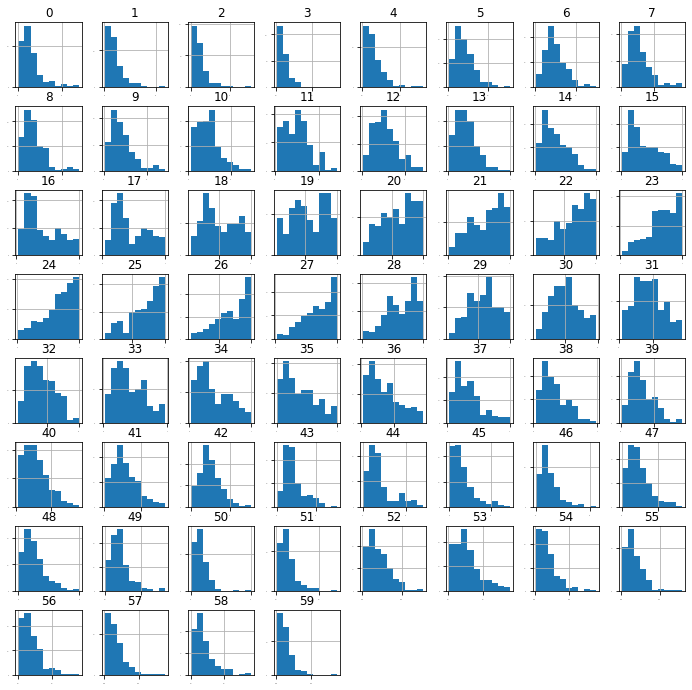

In [8]:
sonar_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [9]:
#seperating data and labels
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

In [10]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

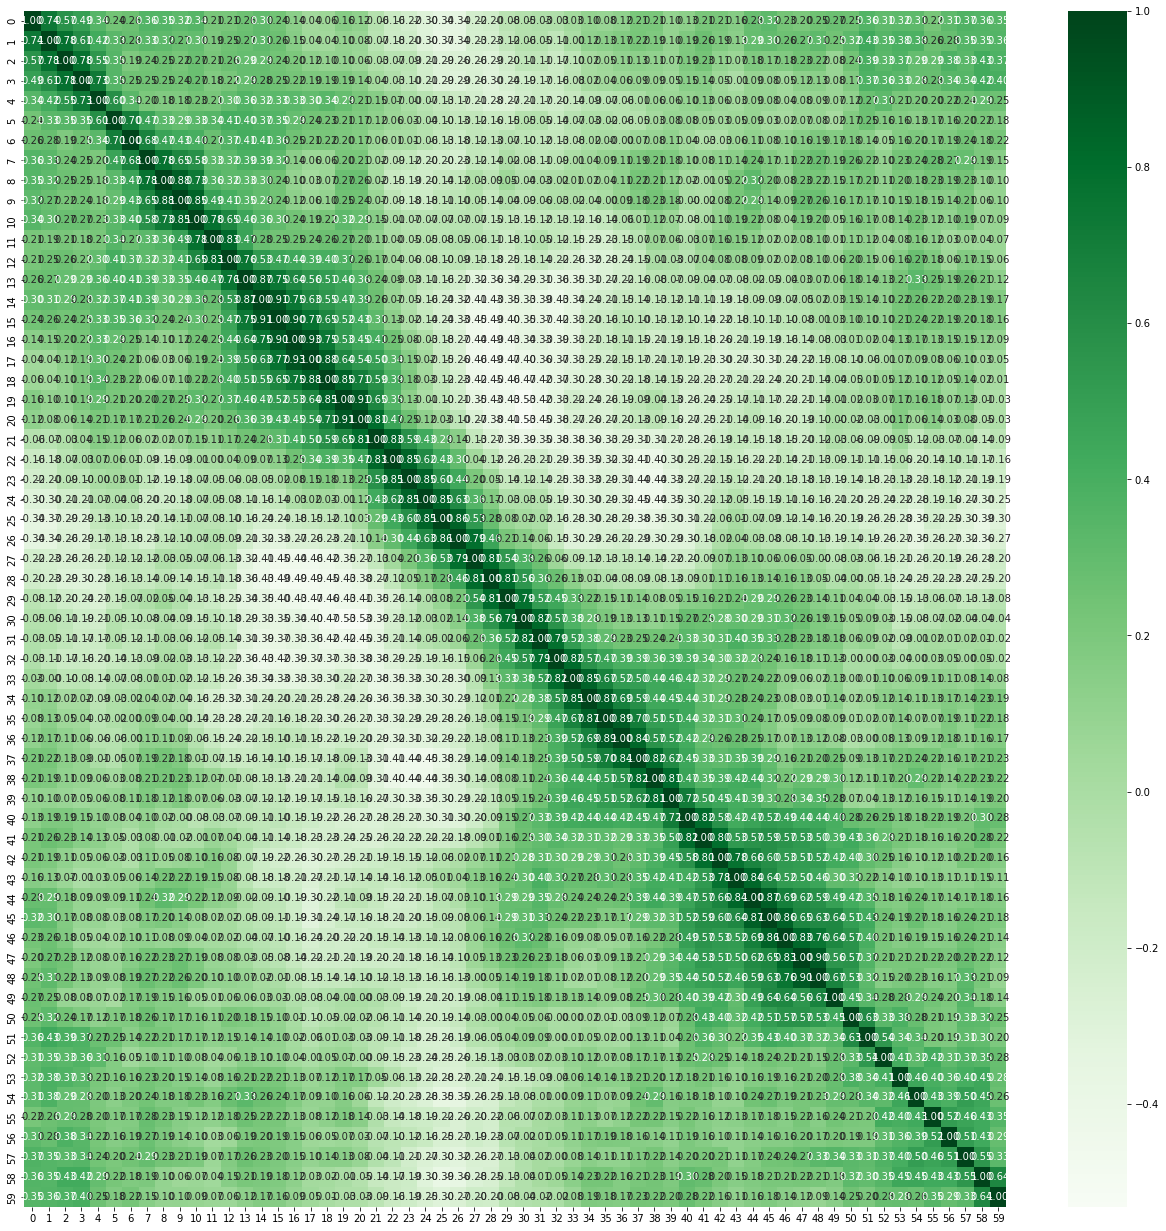

In [11]:
plt.figure(figsize=(22,22))
sns.heatmap(sonar_data.corr(),annot=True,fmt='.2f',cmap='Greens')
plt.show()

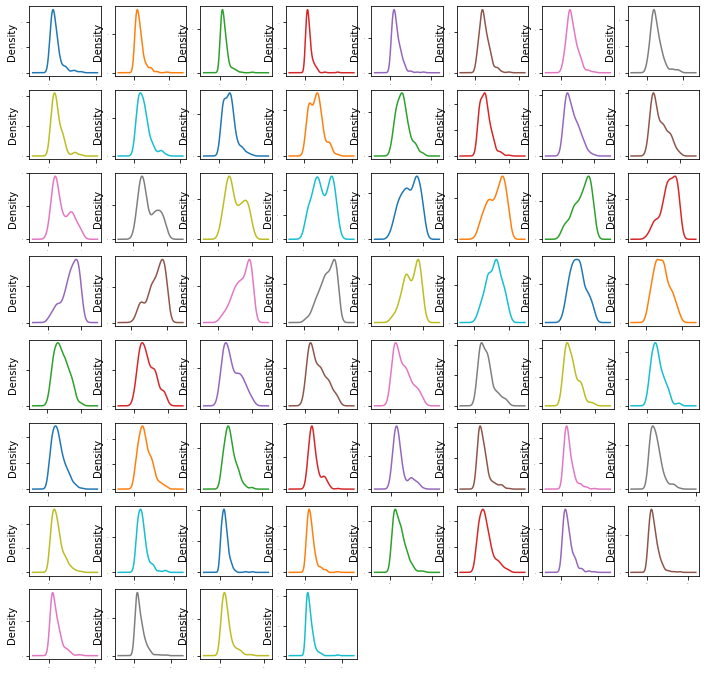

In [12]:
sonar_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

In [32]:
#Training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y, random_state=1)
print("X Shape:",X.shape)
print("X taining data shape:",X_train.shape)
print("X test data shape:",X_test.shape)
print("Y Shape:",Y.shape)
print("Y taining data shape:",Y_train.shape)
print("Y test data shape:",Y_test.shape)

X Shape: (208, 60)
X taining data shape: (187, 60)
X test data shape: (21, 60)
Y Shape: (208,)
Y taining data shape: (187,)
Y test data shape: (21,)


In [33]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

###  Logistic Regression Model

In [15]:
logistic_model = LogisticRegression()

In [16]:
#training the logistic regression model with training data
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
#predictions
logistic_predictions = logistic_model.predict(X_test)
print(classification_report(Y_test,logistic_predictions))

              precision    recall  f1-score   support

           M       0.74      0.64      0.68        22
           R       0.65      0.75      0.70        20

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



In [18]:
#confusion matrix for logistic regression model
print("Confusion matric for logistic  regression Model:\n",confusion_matrix(Y_test,logistic_predictions))

Confusion matric for logistic  regression Model:
 [[14  8]
 [ 5 15]]


In [19]:
#Accuracy on training data
accuracy = logistic_model.score(X_test,Y_test)
print("Accuracy of Logistic Regression Model : ",accuracy)

Accuracy of Logistic Regression Model :  0.6904761904761905


### Decision Tree

In [20]:
dtree_model = DecisionTreeClassifier()

In [21]:
dtree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
dtree_predictions = dtree_model.predict(X_test)
print(classification_report(Y_test,dtree_predictions))

              precision    recall  f1-score   support

           M       0.79      0.68      0.73        22
           R       0.70      0.80      0.74        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42



In [23]:
print("Confusion matrix for decission tree Model:\n",confusion_matrix(Y_test,dtree_predictions))

Confusion matrix for decission tree Model:
 [[15  7]
 [ 4 16]]


In [24]:
accuracy = dtree_model.score(X_test,Y_test)
print("Accuray of decision tree model:",accuracy)

Accuray of decision tree model: 0.7380952380952381


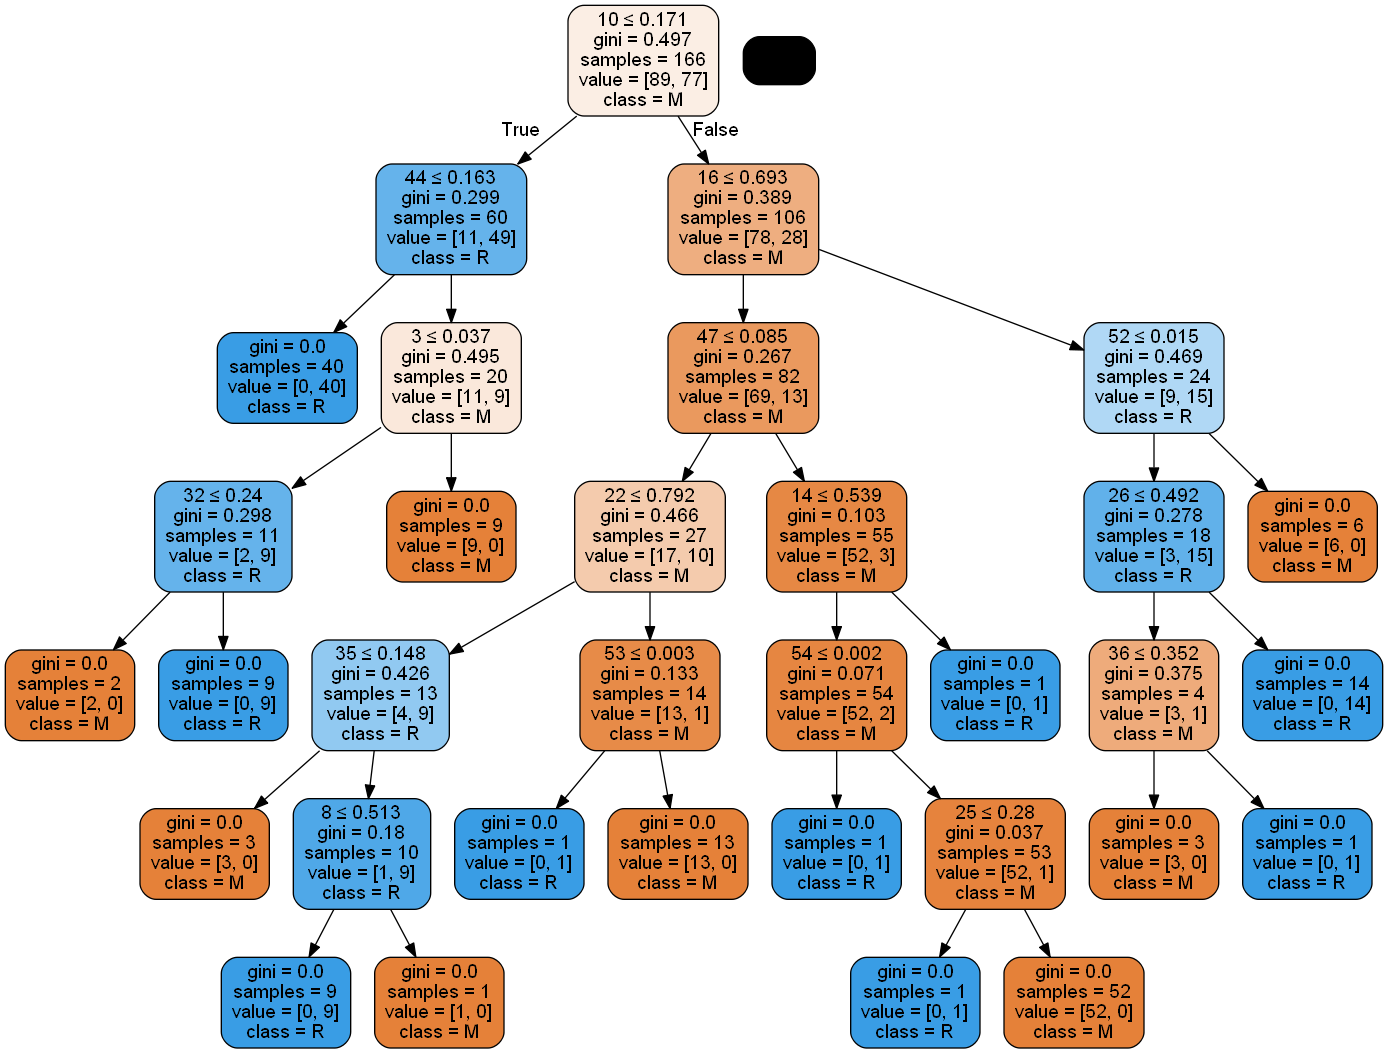

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data,
                filled=True, rounded=True,  special_characters=True,feature_names=X.columns,class_names=['M','R'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### KNN model

In [26]:
#kneighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
Y_pred=knn_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           M       0.84      0.95      0.89        22
           R       0.94      0.80      0.86        20

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42



In [29]:
print("Confusion matrix for KNN model:\n",confusion_matrix(Y_test,Y_pred))

Confusion matrix for KNN model:
 [[21  1]
 [ 4 16]]


In [30]:
accuracy = knn_model.score(X_test,Y_test)
print("Accuracy of KNN model: ",accuracy)

Accuracy of KNN model:  0.8809523809523809


In [31]:
#Predective Project
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine
